In [1]:
"""Unity Software Analysis"""

'Unity Software Analysis'

In [2]:
# Import dependencies 
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
%matplotlib inline

In [3]:
# Import s&p  data 
snp_df = pd.read_csv(
    Path('resources/S&P.csv'),
    index_col = "Date", 
    parse_dates=True, 
    infer_datetime_format=True)

# Rename columns
snp_df.rename(columns = {'Close':'S&P Close'}, inplace=True)

# Drop High, Open and Low columns 
snp_df.drop(columns = {'Open','High', 'Low'}, inplace=True)

# Display a preview of the data 
snp_df.head()

,S&P Close
Date,
2022-04-08,"4,488.28"
2022-04-07,"4,500.21"
2022-04-06,"4,481.15"
2022-04-05,"4,525.12"
2022-04-04,"4,582.64"


In [4]:
# Import Unity data 
u_df = pd.read_csv(
    Path('resources/U.csv'),
    index_col = 'Date', 
    parse_dates=True,
    infer_datetime_format=True)

# Drop all but the Close column
u_df.drop(columns = {'Open', 'High', 'Low', 'Adj Close', 'Volume'}, inplace=True)

# Rename columns
u_df.rename(columns = {'Close':'Unity Close'}, inplace=True)


# Display a preview of the data
u_df.head()

,Unity Close
Date,
2020-09-18,68.349998
2020-09-21,72.959999
2020-09-22,84.820000
2020-09-23,81.849998
2020-09-24,83.199997


In [5]:
# Concatenate the DFs
df = pd.concat([u_df, snp_df], axis='columns', join='inner')

# Preview the DataFrame
df.head()


,Unity Close,S&P Close
Date,,
2021-04-08,98.940002,"4,097.17"
2021-04-09,97.260002,"4,128.80"
2021-04-12,98.000000,"4,127.99"
2021-04-13,101.570000,"4,141.59"
2021-04-14,101.120003,"4,124.66"


In [6]:
# Evaluate and clean the date
display(df.isnull().sum())
display(df.dtypes)
display(df.duplicated())

Unity Close    0
S&P Close      0
dtype: int64

Unity Close    float64
S&P Close       object
dtype: object

Date
2021-04-08    False
2021-04-09    False
2021-04-12    False
2021-04-13    False
2021-04-14    False
              ...  
2022-04-04    False
2022-04-05    False
2022-04-06    False
2022-04-07    False
2022-04-08    False
Length: 255, dtype: bool

In [7]:
# Convert S&P Close to a float
df["S&P Close"] = df["S&P Close"].str.replace(",", "", regex=False)
df['S&P Close'] = df['S&P Close'].astype('float')

# preview the data
df.head()

,Unity Close,S&P Close
Date,,
2021-04-08,98.940002,4097.17
2021-04-09,97.260002,4128.80
2021-04-12,98.000000,4127.99
2021-04-13,101.570000,4141.59
2021-04-14,101.120003,4124.66


In [8]:
# Calculate the daily returns 
daily_returns = df.pct_change().dropna()

# Preview the data 
daily_returns.head()

,Unity Close,S&P Close
Date,,
2021-04-09,-0.016980,0.007720
2021-04-12,0.007608,-0.000196
2021-04-13,0.036429,0.003295
2021-04-14,-0.004430,-0.004088
2021-04-15,0.007911,0.011094


In [9]:
# View a data summary 
daily_returns.describe()

,Unity Close,S&P Close
count,254.000000,254.000000
mean,0.000466,0.000403
std,0.040488,0.009415
min,-0.120135,-0.029518
25%,-0.024199,-0.005204
50%,0.002300,0.000940
75%,0.021946,0.006439
max,0.174195,0.025698


In [10]:
# Calculate the market variance 
market_variance = daily_returns['S&P Close'].var()
print(f"S&P Variance: {market_variance: .8f}")

S&P Variance:  0.00008864


In [11]:
# calculate the covariance of U stock with the market 
u_cov = daily_returns['Unity Close'].cov(daily_returns['S&P Close'])
print(f"Unity Cov: {u_cov: .8f}")

Unity Cov:  0.00019737


In [12]:
# calculate Unity's beta 
u_beta = u_cov / market_variance 
print(f"Beta: {u_beta}")

Beta: 2.2266477411598413


<AxesSubplot:title={'center':'Market 30-Day Rolling Variance'}, xlabel='Date'>

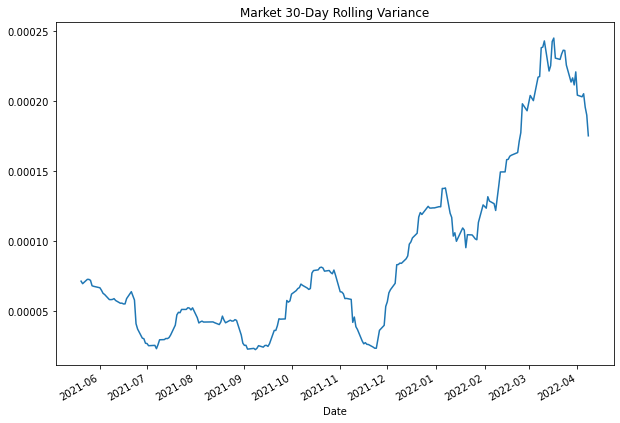

In [14]:
# Calculate the rolling 30 day variance of the market 
snp_rolling_30 = daily_returns['S&P Close'].rolling(window=30).var()

# Plot the rolling variance 
snp_rolling_30.plot(figsize=(10,7), title='Market 30-Day Rolling Variance')

<AxesSubplot:title={'center':'Unity 30-Day Rolling Covariance'}, xlabel='Date'>

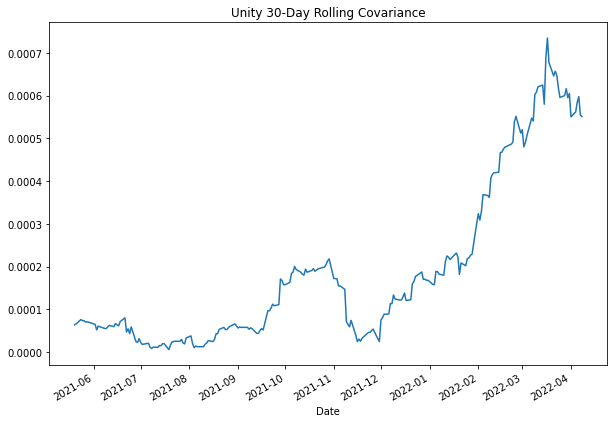

In [15]:
# Calculate the rolling covariance of Unity with the market 
u_rolling_30 = daily_returns['Unity Close'].rolling(window=30).cov(daily_returns['S&P Close'])

# Plot 
u_rolling_30.plot(figsize=(10,7), title='Unity 30-Day Rolling Covariance')

<AxesSubplot:title={'center':'Unity 30-Day Rolling Beta'}, xlabel='Date'>

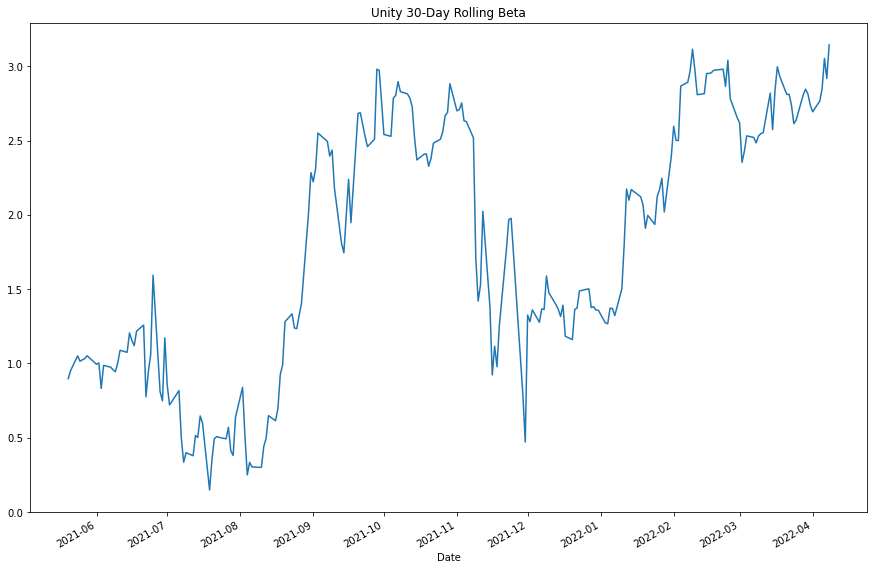

In [20]:
# calculate the 30 day rolling beta of the stock 
u_rolling_beta = u_rolling_30 / snp_rolling_30

# plot the rolling beta 
u_rolling_beta.plot(figsize=(15,10), title='Unity 30-Day Rolling Beta')

In [21]:
u_df['Unity Close'].mean()

118.59506381679387

In [22]:
daily_returns['Unity Close'].mean()

0.0004664446095104808

In [24]:
#calculate the annual average returns 
annual_return = daily_returns.mean() * 252
annual_return

Unity Close    0.117544
S&P Close      0.101605
dtype: float64

In [34]:
# calculate the annual std 
annual_std = daily_returns.std() * np.sqrt(252)
annual_std

Unity Close    0.642720
S&P Close      0.149456
dtype: float64

In [26]:
# Calculate sharpe ratios
sharpe_ratio = annual_return / annual_std
sharpe_ratio

Unity Close    0.182885
S&P Close      0.679836
dtype: float64

<AxesSubplot:title={'center':'Daily Returns of S&P v. Unity'}, xlabel='Date'>

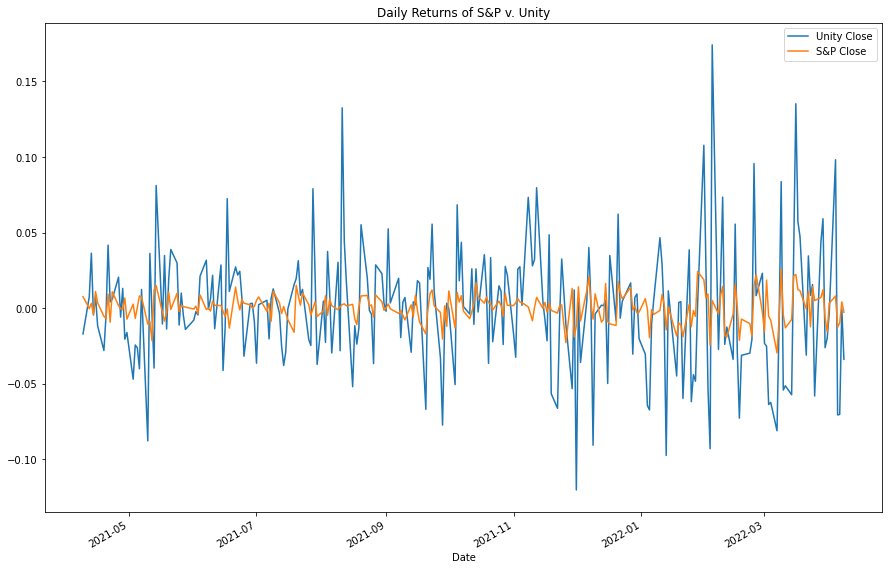

In [27]:
daily_returns.plot(figsize=(15,10), title='Daily Returns of S&P v. Unity')

In [29]:
# calculate cumulative returns 
cumulative_returns = (1 + daily_returns).cumprod()
cumulative_returns

,Unity Close,S&P Close
Date,,
2021-04-09,0.983020,1.007720
2021-04-12,0.990499,1.007522
2021-04-13,1.026582,1.010842
2021-04-14,1.022034,1.006710
2021-04-15,1.030119,1.017878
...,...,...
2022-04-04,1.098039,1.118489
2022-04-05,1.020619,1.104450
2022-04-06,0.948959,1.093718
